<a href="https://colab.research.google.com/github/sagnikmitra/ML_colab/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
train = pd.read_csv('train.csv')

In [0]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EXPLORATORY DATA ANALYSIS (EDA)

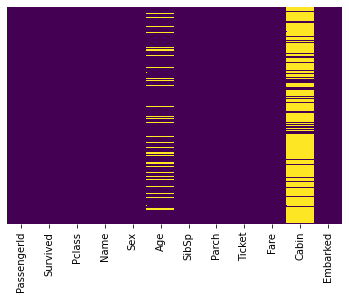

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

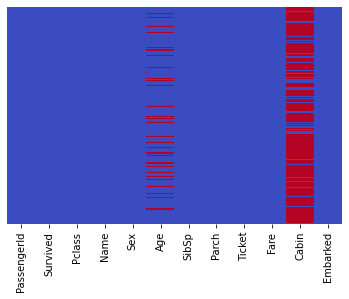

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

TO RESOLVE THE MISSING VALUES APPROACH - IN THIS CASE, CABIN & AGE, THESE COLUMNS ARECONTAINING MISSING VALUES, THE PORTION OF AGE THAT IS MISSING IS LIKELY SMALL BUT FOR REASONABLE REPLACEMENT WITH SOME FORM OF IMPUTATION IS REQUIRED (RECALL SUNSPOTS DATASET FROM SILSO)

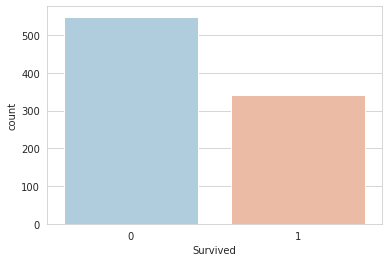

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

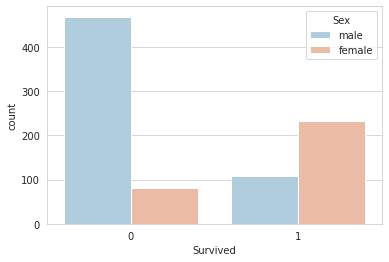

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

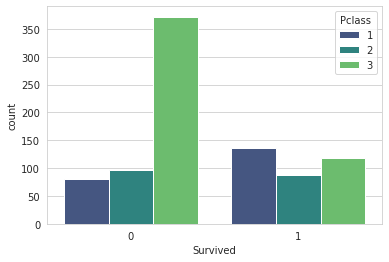

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='viridis')

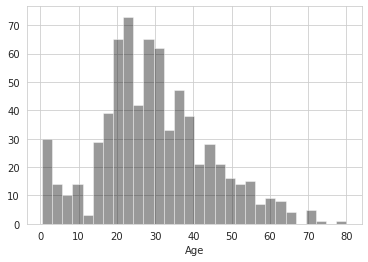

In [0]:
sns.distplot(train['Age'].dropna(),kde=False,color='black',bins=30)

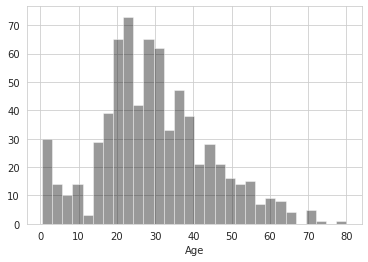

In [0]:
sns.distplot(train['Age'],kde=False,color='black',bins=30)

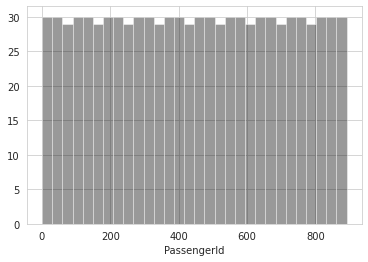

In [0]:
sns.distplot(train['PassengerId'].dropna(),kde=False,color='black',bins=30)

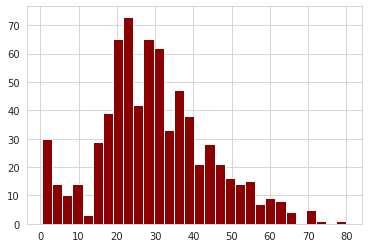

In [0]:
train['Age'].hist(bins=30,color='darkred',alpha=1)

In [0]:
#Similar to Matplotlib / Seaborn / Bokeh - Cufflinks plot

In [0]:
pip install cufflinks

In [0]:
import cufflinks as cf #conda install cufflinks - For Anaconda Navigator #pip install cufflinks - For basic python
cf.go_offline() 

In [0]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

In [0]:
#Data Cleaning - We want to fill in missing age dta instead of just dropping. One way to resolve the problem 
#is by fillig in the mean age of the whole dataset (Imputation)

In [0]:
train['Age'].mean()

29.69911764705882

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 30
    elif Pclass == 2:
      return 29
    else:
      return 25
  else:
    return Age

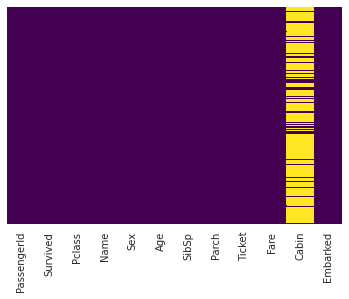

In [0]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.drop(["Cabin"],axis=1,inplace=True)

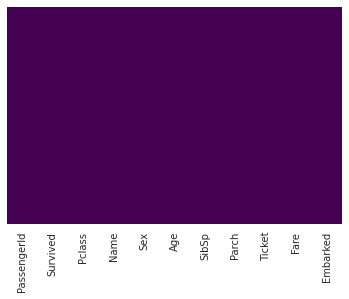

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
#dummy variable concept
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [0]:
train=pd.concat([train,sex,embark],axis=1)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.28, random_state=101) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
#Evaluation Model
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       144
           1       0.77      0.65      0.70       106

    accuracy                           0.77       250
   macro avg       0.77      0.75      0.76       250
weighted avg       0.77      0.77      0.76       250

